# Face Recognition 

#### Importamos Librerias

In [1]:
import os 
import pandas as pd
import numpy as np
import tensorflow as ts
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### Extraemos datos

In [2]:
dataDir = 'dataset/part1/part1/'
listImages = os.listdir(dataDir)

map_characters = {
    0: 'Male',
    1: 'Female'
}


#### Creamos el Dataset

In [3]:
images = []
ages = []
genders = []



for filename in listImages:
    file = filename.split('_')
    age = file[0]
    gender = file[1]
    ages.append(age)
    genders.append(gender)
    if filename.endswith('.jpg'):
        filePath = os.path.join(dataDir,filename)
        image = cv2.imread(filePath)
        if image is None:
            print(f"Error al leer la imagen: {filePath}")
            continue
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image= cv2.resize(image, (64,64))
        images.append(image)
print(images)

[array([[230, 234, 234, ..., 227, 227, 226],
       [234, 227, 234, ..., 228, 228, 227],
       [234, 233, 228, ..., 223, 227, 227],
       ...,
       [253, 255, 255, ..., 253, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[170, 180, 191, ..., 169, 193, 202],
       [171, 188, 189, ..., 179, 182, 204],
       [124, 117, 106, ..., 160, 198, 192],
       ...,
       [ 39,  44,  45, ...,  70,  81,  94],
       [ 46, 129,  86, ...,  95,  92, 109],
       [ 60, 127, 102, ..., 118, 102,  97]], dtype=uint8), array([[86, 73, 86, ...,  0,  1, 10],
       [77, 83, 88, ...,  0,  1,  1],
       [56, 86, 98, ...,  0,  0,  5],
       ...,
       [38, 55, 48, ...,  5,  0,  2],
       [46, 51, 73, ...,  6,  0,  1],
       [27, 68, 69, ...,  5,  5, 10]], dtype=uint8), array([[245, 243, 243, ..., 255, 255, 255],
       [243, 242, 241, ..., 255, 255, 255],
       [241, 240, 240, ..., 255, 255, 255],
       ...,
       [213, 211, 

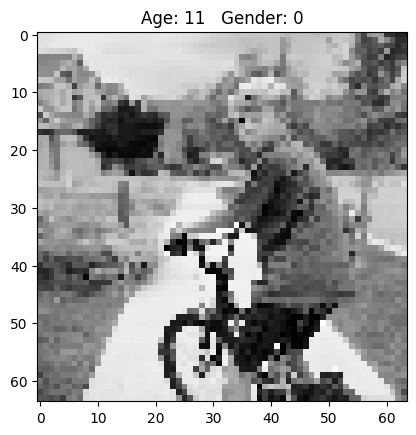

In [4]:
position = 155
if images:
    plt.title(f'Age: {ages[position]}   Gender: {genders[position]}')
    plt.imshow(images[position], cmap='gray')
    plt.show()

#### Preprocesamiento

In [5]:
# Convertimos a un array de numpy
images = np.array(images)
ages = np.array(ages, dtype=int)
genders = np.array(genders, dtype=int)

# Normalizamos de las imagenes
images = images / 255


In [6]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(images, genders, test_size=0.2, random_state=42)

# Construir un modelo simple de clasificación con TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64,64,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(64,64,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Supongo que tienes dos géneros
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_acc}")


c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/15
254/254 ━━━━━━━━━━━━━━━━━━━━ 17s 59ms/step - accuracy: 0.5541 - loss: 0.6841 - val_accuracy: 0.5942 - val_loss: 0.6505
Epoch 2/15
254/254 ━━━━━━━━━━━━━━━━━━━━ 16s 61ms/step - accuracy: 0.6282 - loss: 0.6361 - val_accuracy: 0.6583 - val_loss: 0.6163
Epoch 3/15
254/254 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - accuracy: 0.6718 - loss: 0.5954 - val_accuracy: 0.6627 - val_loss: 0.6002
Epoch 4/15
254/254 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.6951 - loss: 0.5681 - val_accuracy: 0.6706 - val_loss: 0.5909
Epoch 5/15
254/254 ━━━━━━━━━━━━━━━━━━━━ 16s 61ms/step - accuracy: 0.7082 - loss: 0.5501 - val_accuracy: 0.6652 - val_loss: 0.5866
Epoch 6/15
254/254 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.7388 - loss: 0.5131 - val_accuracy: 0.6829 - val_loss: 0.5706
Epoch 7/15
254/254 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.7604 - loss: 0.4811 - val_accuracy: 0.6805 - val_loss: 0.5734
Epoch 8/15
254/254 ━━━━━━━━━━━━━━━━━━━━ 16s 61ms/step - accuracy: 0.7850 - loss: 0.4467 - 

In [7]:
model.save('gender_classification_model.h5')

In [54]:
def capture_image():
    # Iniciar la captura de video (0 es usualmente el índice de la cámara por defecto)
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("No se pudo abrir la cámara")
        exit()

    print("La cámara se abrió correctamente")

    while True:
        ret, frame = cap.read()
        
        cv2.imwrite('frame.jpg', frame)
        print("Frame capturado y guardado como 'frame.jpg'")

        break
        
    # Liberar la captura
    cap.release()
    print("Captura liberada correctamente")
    return frame


La cámara se abrió correctamente
Frame capturado y guardado como 'frame.jpg'
Captura liberada correctamente


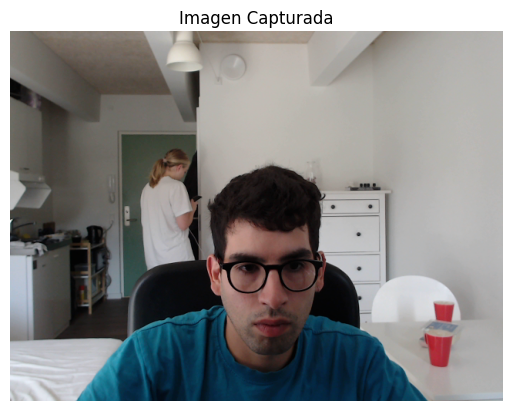

In [79]:
captured_image = capture_image()
captured_image = cv2.cvtColor(captured_image, cv2.COLOR_BGR2RGB)
plt.title('Imagen Capturada')
plt.imshow(captured_image)
plt.axis('off')
plt.show() 

La cámara se abrió correctamente
Frame capturado y guardado como 'frame.jpg'


Captura liberada correctamente
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicción: Hombre


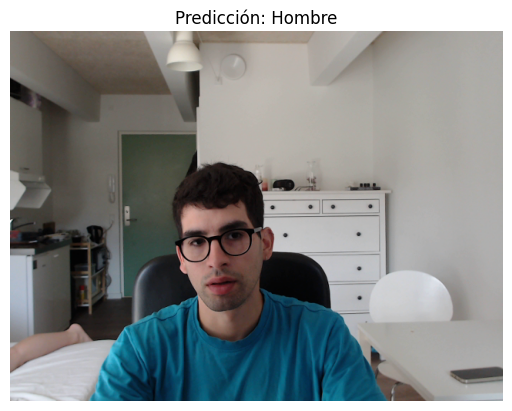

In [114]:
captured_image = capture_image()
captured_image = cv2.cvtColor(captured_image, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(captured_image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (64, 64))
image = image / 255.0
image = np.expand_dims(image, axis=-1)  # Añadir dimensión para el canal
image = np.expand_dims(image, axis=0)
model = tf.keras.models.load_model('gender_classification_model.h5')
prediction = model.predict(image)
gender = 'Hombre' if prediction[0] < 0.5 else "Mujer"
print(f"Predicción: {gender}")
plt.title(f"Predicción: {gender}")
plt.imshow(captured_image)
plt.axis('off')
plt.show() 